In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c
import sympy as sy
from sympy import *

In [158]:
# Funktionen
def std(am, werte):
    summen_der_quadrate = 0
    for wert in werte:
        summen_der_quadrate+=(wert-am)**2       
    return np.sqrt(summen_der_quadrate/(werte.size-1))

def stu(std, werte):
    return std/np.sqrt(werte.size)

def fehler(f, werte, unsicherheiten, variablen):
    zMax = 0
    for i in range(werte.size):
        dif = np.abs(sy.diff(f, variablen[i]))
        zMax += (dif * unsicherheiten[i])**2
    zMax = sqrt(zMax)
    for j in range(werte.size):
        zMax = sub(zMax, variablen[j], werte[j])
    return zMax

def fehlerMax(f, werte, unsicherheiten, variablen):
    zMax = 0
    for i in range(werte.size):
        dif = np.abs(sy.diff(f, variablen[i]))
        zMax += dif * unsicherheiten[i]
    for j in range(werte.size):
        zMax = sub(zMax, variablen[j], werte[j])
    return zMax

def sub(zMax, variable, wert):
    return zMax.subs([(variable, wert)])

def einfachGaussAdd(unsicherheiten, koeffizienten):
    dz = 0
    for i in range (unsicherheiten.size):
        dz += (unsicherheiten[i]*unsicherheiten[i])**2
    return sqrt(dz)

def einfachGaussMult(unsicherheiten, werte, exponenten):
    dz = 0
    for i in range (unsicherheiten.size):
        dz += (exponenten[i]*unsicherheiten[i]/werte[i])**2
    return sqrt(dz)

def vertraeglichkeit(am_1, am_2, stu_1, stu_2):
    return (np.abs(am_1-am_2)/(sqrt((stu_1**2)*(stu_2**2))))

def streuung(x, y):
    s = 0
    for i in range(x.size):
        s += (y[i]+(bestA(x, y)+bestB(x, y)*x[i]))**2
    return np.sqrt(s/(x.size-2))

def stuA(x, y):
    s = streuung(x, y)
    return s*np.sqrt(sum(x**2)/((x.size*sum(x**2)-sum(x)**2)))

def stuB(x, y):
    s = streuung(x, y)
    return s*np.sqrt(x.size/((x.size*sum(x**2)-sum(x)**2)))

def bestA(x, y):
    return (sum(x**2)*sum(y)-sum(x)*sum(x*y))/(x.size*sum(x**2)-sum(x)**2)

def bestB(x, y):
    return (x.size*sum(x*y)-sum(x)*sum(y))/(x.size*sum(x**2)-sum(x)**2)


'''def groessterBeitrag(f, werte, unsicherheiten, variablen):
    zMax = 0
    zMaxArray = np.array([0])
    for i in range (werte.size):
        dif = np.abs(sy.diff(f, variablen[i]))
        zMax = (dif * unsicherheiten[i])
        for j in range(werte.size):
            zMax = sub(zMax, variablen[j], werte[j])
        x = np.array([zMax])
        print(x)
        np.insert(zMaxArray, float, x)
        print(zMax, zMaxArray)
    return np.amax(zMaxArray)'''

'def groessterBeitrag(f, werte, unsicherheiten, variablen):\n    zMax = 0\n    zMaxArray = np.array([0])\n    for i in range (werte.size):\n        dif = np.abs(sy.diff(f, variablen[i]))\n        zMax = (dif * unsicherheiten[i])\n        for j in range(werte.size):\n            zMax = sub(zMax, variablen[j], werte[j])\n        x = np.array([zMax])\n        print(x)\n        np.insert(zMaxArray, float, x)\n        print(zMax, zMaxArray)\n    return np.amax(zMaxArray)'

In [ ]:
# Erinnerungen
# x = np.array([,])
# x.size
# x, y = symbols('x y')
# expr = x*y
# expr.subs([(x, wert_x), (y, wert_y)])
# np.mean(zeiten)
# b, l = symbols('b l')

In [165]:
laengen = np.array([0.663, 0.897, 0.742, 0.505, 0.420])#Meter
zeiten = np.array([1.55, 1.56, 1.63, 1.59, 1.59, 1.63, 1.61, 1.64, 1.59, 1.72, 1.65]) #Sekunden
zeiten_10 = np.array([16.16, 18.94, 17.13, 14.20, 12.87])/10 #Sekunden

l, t = symbols('l t')
variablen = [l, t]
g = (l*4*(np.pi)**2)/t**2
gTest = g
print(g)
bs = np.array([laengen[0],np.mean(zeiten)])

z_mean =np.mean(zeiten)
z_std = std(z_mean, zeiten)
z_stu = stu(z_std, zeiten)
z_10_mean =np.mean(zeiten_10)
z_10_std = std(z_10_mean, zeiten_10)
z_10_stu = stu(z_10_std, zeiten_10)
l_mean =np.mean(laengen)
l_std = std(l_mean, laengen)
l_stu = stu(l_std, laengen)

print(z_mean, z_std, z_stu)
print()

for j in range(bs.size):
    gTest = sub(gTest, variablen[j], bs[j])
print('Unser netter g-Wert: ',gTest)

print('Fehler bei einer länge, 10 Zeiten: ', 
      fehler(g, np.array([laengen[0],np.mean(zeiten)]), np.array([0.001, z_stu]), variablen))
print('Fehler bei mehreren Längen, 10 Perioden, 5 Zeiten: ', 
      fehler(g, np.array([np.mean(laengen),np.mean(zeiten_10)]), np.array([l_stu,z_10_stu]), variablen))
print('relative Unsicherheit: ', 
      einfachGaussMult(np.array([0.001, z_stu]), np.array([laengen[0],np.mean(zeiten)]), np.array([1,-2])))

# groessterBeitrag(g, np.array([laengen[0],np.mean(zeiten)]), np.array([0.001, z_stu]), variablen)

39.4784176043574*l/t**2
1.6145454545454543 0.047405408207004424 0.014293268368751654

Unser netter g-Wert:  10.0409016347673
Fehler bei einer länge, 10 Zeiten:  0.178424341623544
Fehler bei mehreren Längen, 10 Perioden, 5 Zeiten:  1.90627252165077
relative Unsicherheit:  0.0177697529677751


1.7228307205486433
3.0036462471640912
1.1335254533379064


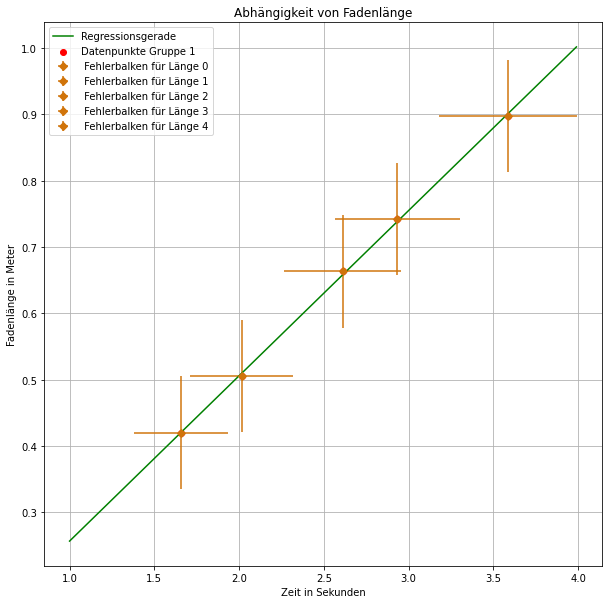

Steigung der geraden aka b: 0.24913764564954557
Achsenabschnitt aka a: 0.007317132642335971
Erwartetes b: 0.254339439280212
Ermitteltete Erdbeschleunigung 9.835543400441924


In [164]:
y = laengen
x = zeiten_10**2
a = gTest/(4*3.14159**2)

# Standard plotting
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y, color='r', label='Datenpunkte Gruppe 1')

for i in range(5):
    ax.errorbar(x[i], y[i], xerr=z_10_stu*2*zeiten_10[i], yerr=l_stu, 
                fmt='D', color='#d0740b', label=' Fehlerbalken für Länge '+str(i))

w_f_p = np.arange(1, 4, 0.01)

m, b = np.polyfit(x, y, 1)
ax.plot(w_f_p,w_f_p*m+b,color='g',label="Regressionsgerade")
    
    
ax.set(xlabel='Zeit in Sekunden', ylabel='Fadenlänge in Meter',
       title='Abhängigkeit von Fadenlänge')

best_a = bestA(x, y)
best_b = bestB(x, y)


print(streuung(x, y))
print(stuA(x, y))
print(stuB(x, y))

# ax.plot(w_f_p,w_f_p*(m+stuB(x, y))+b-stuA(x, y),color='b',label="Regressionsgerade max")
# ax.plot(w_f_p,w_f_p*(m-stuB(x, y))+b+stuA(x, y),color='y',label="Regressionsgerade min")

ax.legend()
ax.grid()

#fig.savefig("test.png")
plt.show()


print('Steigung der geraden aka b: '+ str(m))
print('Achsenabschnitt aka a: '+ str(b))
print('Erwartetes b: '+ str(a))

# Ermitteltete Erdbeschleunigung
print('Ermitteltete Erdbeschleunigung', m*(4*3.14159**2))



[Text(0, 0.5, 'Messmethode'),
 Text(0.5, 0, 'Erdbesch. in m/s²'),
 Text(0.5, 1.0, 'Vergleich der Messmethoden')]

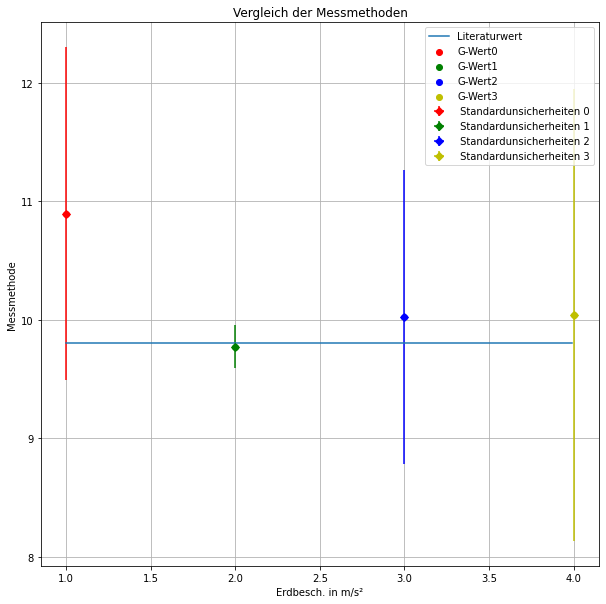

In [183]:
# Vergleich Erdbeschleunigungen
g1 = (laengen[0]*4*np.pi**2)/zeiten[0]**2
dg1 = fehler(g, np.array([laengen[0],zeiten[0]]), np.array([0.001, 0.1]), variablen)
g2 = (l_mean*4*np.pi**2)/z_mean**2
dg2 = fehler(g, np.array([laengen[0],np.mean(zeiten)]), np.array([0.001, z_stu]), variablen)
g3 = (laengen[0]*4*np.pi**2)/zeiten_10[0]**2
dg3 = fehler(g, np.array([laengen[0],zeiten_10[0]]), np.array([0.001, 0.1]), variablen)
g4 = gTest
dg4 = fehler(g, np.array([np.mean(laengen),np.mean(zeiten_10)]), np.array([l_stu,z_10_stu]), variablen)

lit = np.empty(300)
lit.fill(9.808)

y = np.array([g1, g2, g3, g4], dtype=float)
dg = np.array([dg1, dg2, dg3, dg4],dtype=float)
x = np.array([1, 2, 3, 4])

# Standard plotting
fig, ax = plt.subplots(figsize=(10,10))

colors = ['r', 'g', 'b', 'y']
for i in range(4):
    ax.scatter(x[i], y[i], color=colors[i], label='G-Wert'+str(i))
    ax.errorbar(x[i], y[i], xerr=0, yerr=dg[i],
                fmt='D', color=colors[i], label=' Standardunsicherheiten '+str(i))

ax.plot(w_f_p, lit, label="Literaturwert")
    
ax.legend()
ax.grid()

ax.set(xlabel='Erdbesch. in m/s²', ylabel='Messmethode',
       title='Vergleich der Messmethoden')
#fig.savefig("test.png")